In [29]:
import numpy as np
import matplotlib.pyplot as plt
x_train = np.array([1.0,2.0]) #features
y_train = np.array([300,500]) #targets


In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [30]:
#cost function
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        fwb_xi = w*x[i] + b
        cost = cost + (fwb_xi - y[i])**2
    total_cost = (cost/2*m)
    return total_cost
    


In [31]:
compute_cost(x_train,y_train,5,0)

327125.0


*gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [32]:
def compute_gradients(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        fwb_xi = x[i] * w + b
        dj_dw_i = (fwb_xi - y[i]) * x[i]
        dj_db_i = (fwb_xi -y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    return ((dj_dw/m),(dj_db/m))

In [43]:
g =compute_gradients(x_train,y_train,0,0)
g[0]


-650.0

In [44]:
def gradient_descent(x,y,w_in, b_in, alpha,iterations,cost_function, gradient_function):
    J_history = []
    p_history = []
    for i in range(iterations):
        j = cost_function(x,y,w_in,b_in)
        w = w_in - (alpha * (gradient_function(x,y,w_in,b_in))[0]) 
        b = b_in - (alpha * (gradient_function(x,y,w_in,b_in))[1])
        if i<100000:
            J_history.append(j)
            p_history.append([w,b])
        w_in = w
        b_in = b
    return w, b, J_history,p_history
        
    

In [45]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradients)

In [46]:
J_hist

[340000.0,
 317099.25,
 295741.23890625,
 275822.0377265278,
 257244.7188064392,
 239918.88417343027,
 223760.2256546375,
 208690.11462808127,
 194635.2194109071,
 181527.1484228614,
 169302.1173886138,
 157900.63895951133,
 147267.23324444453,
 137350.15784125155,
 128101.15605497506,
 119475.22207778729,
 111430.3819879338,
 103927.48950202335,
 96930.03548678139,
 90403.97030334019,
 84317.53811958151,
 78641.12238428522,
 73347.101711152,
 68409.71547142221,
 63804.938441056736,
 59510.36389250505,
 55505.0945621775,
 51769.64096306334,
 48285.826547676785,
 45036.699259848574,
 42006.44904496819,
 39180.33091727671,
 36544.59320985092,
 34086.41065813837,
 31793.821991424218,
 29655.67172854548,
 27661.55589462758,
 25801.771394696934,
 24067.268797818917,
 22449.608302005385,
 20940.918665614783,
 19533.858905402092,
 18221.582574839063,
 16997.704448880926,
 15856.269453065388,
 14791.723685751196,
 13798.887392488468,
 12872.929761012592,
 12009.345414212416,
 11203.93248668617

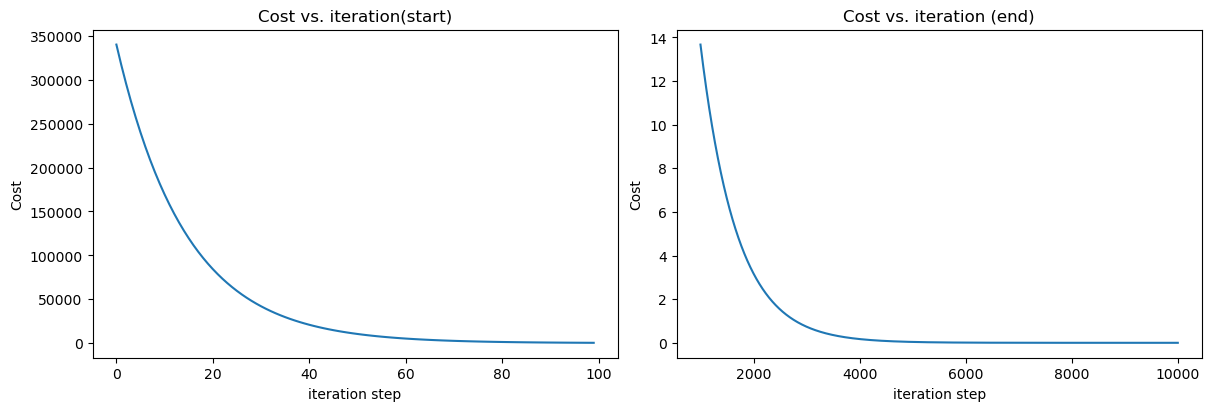

In [48]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()